In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
fname = './data/diabetes.csv'
df = pd.read_csv(fname)
df.info()
df.describe()
df.head()
print(df.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')


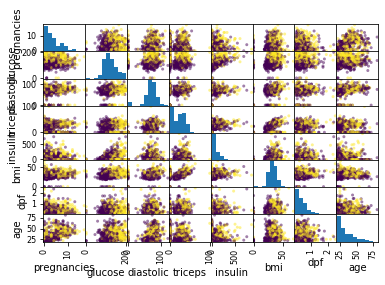

In [3]:
data = df.drop('diabetes', axis=1)
#df.drop('diabetes', axis=1).values
target = df.diabetes # df['diabetes'].values
_ = pd.plotting.scatter_matrix(data, c = target)

In [4]:
#k-nearest neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [5]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
df_new = pd.DataFrame([[2,200,70,30,0,35,0.6,40]], columns = data.columns)
print(df_new)

   pregnancies  glucose  diastolic  triceps  insulin  bmi  dpf  age
0            2      200         70       30        0   35  0.6   40


In [7]:
prediction = knn.predict(df_new)
print('Prediction:', prediction)

Prediction: [1]


In [8]:
#split data to train and test set


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 21, stratify = target)

In [10]:
x_train.shape

(537, 8)

In [11]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
y_prediction = knn.predict(x_test)
print('test set prediction \n', y_prediction)

test set prediction 
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0]


In [48]:
accuracy = knn.score(x_test, y_test)
print('accuracy = ', round(accuracy, 2))

accuracy =  0.73


In [17]:
print(confusion_matrix(y_test, y_prediction))

[[136  14]
 [ 49  32]]


In [18]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       150
           1       0.70      0.40      0.50        81

    accuracy                           0.73       231
   macro avg       0.72      0.65      0.66       231
weighted avg       0.72      0.73      0.70       231



0.655